In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)

In [8]:
df

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [10]:
X=pd.DataFrame(df.data,columns=df.feature_names)
y=df.target

In [11]:
X,y

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 0    

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [16]:
y_pred=regressor.predict(X_test)

In [17]:
y_pred

array([0.414  , 1.203  , 5.00001, ..., 5.00001, 0.66   , 2.071  ])

In [18]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [19]:
score

0.6302571486792539

In [20]:
## Hyperparameter Tunning
parameter={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
    'max_features':['auto', 'sqrt', 'log2'],
    }
regressor=DecisionTreeRegressor()

In [21]:
from sklearn.model_selection import GridSearchCV
regressorCV = GridSearchCV(estimator=regressor, param_grid=parameter, cv=5, verbose=True)

In [22]:
regressorCV.fit(X_train,y_train)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=True)

In [23]:
regressorCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [25]:
y_pred=regressorCV.predict(X_test)

In [26]:
r2_score(y_pred,y_test)

0.623106824299301

In [30]:
regressor=DecisionTreeRegressor(criterion= 'squared_error',
 max_features= 'log2',
 max_depth= 10,
 splitter= 'best')

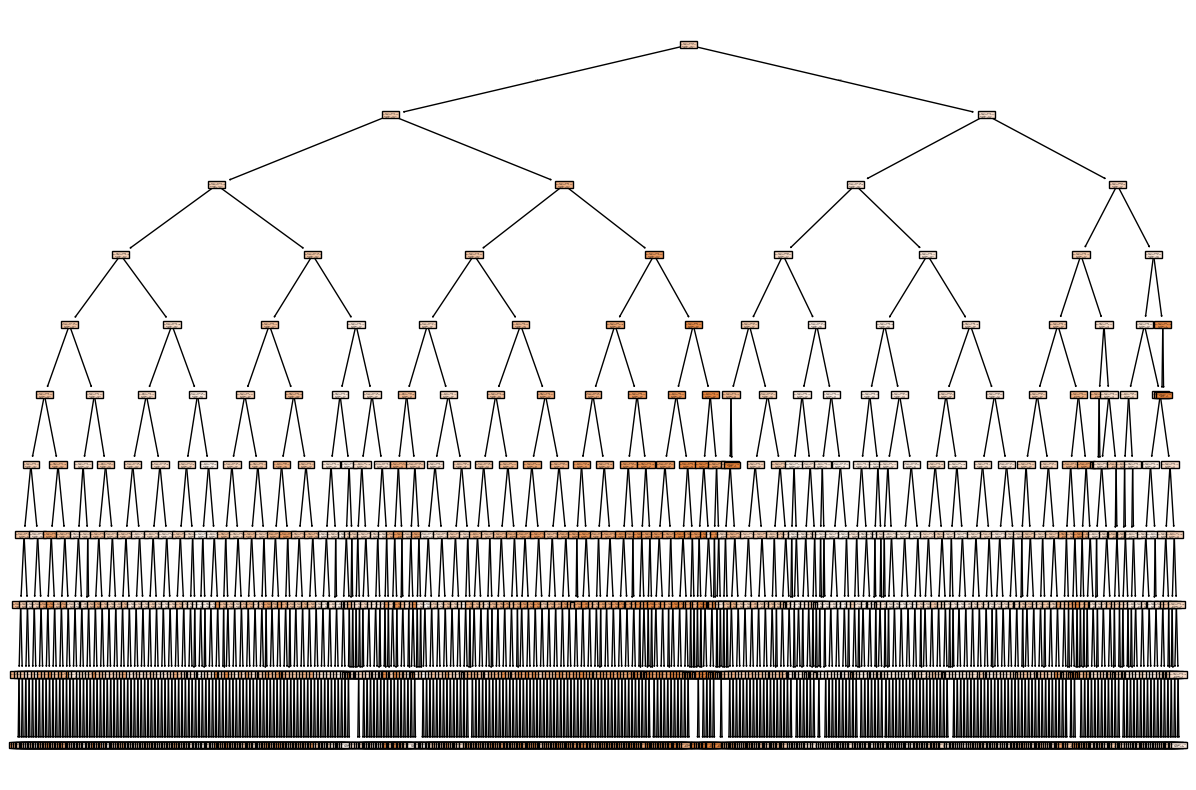

In [31]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
regressor.fit(X_train, y_train) # Fit the model before plotting
tree.plot_tree(regressor,filled=True)
plt.show()